In this notebook, we delve into the realm of
predictive analytics to estimate the calories burnt during physical activities using the powerful XGBoost algorithm.




IMPORTING SOME LIBRARIES

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

Load the Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving exercise.csv to exercise.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving calories.csv to calories.csv


In [4]:
calories_dataset = pd.read_csv("calories.csv")
exercise_dataset = pd.read_csv("exercise.csv")

In [5]:
exercise_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
calories_dataset.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Concat calories and exercise dataset

In [9]:
df =pd.concat([exercise_dataset,calories_dataset],axis= 1)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,15644082,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,17212577,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,17271188,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,18643037,11.0


In [10]:
df.drop(["User_ID"],axis=1, inplace=True)
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [12]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [13]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Visualization of data

In [14]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

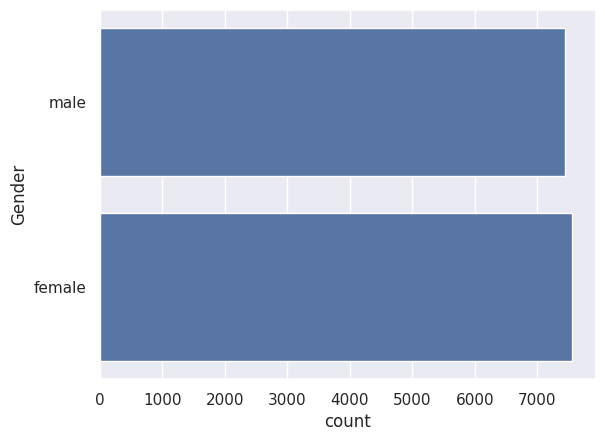

In [15]:
sns.countplot(df['Gender'])

<ipython-input-16-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

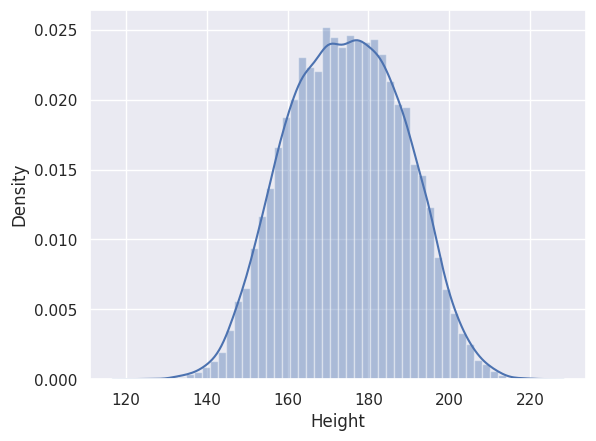

In [16]:
sns.distplot(df['Height'])

<ipython-input-17-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

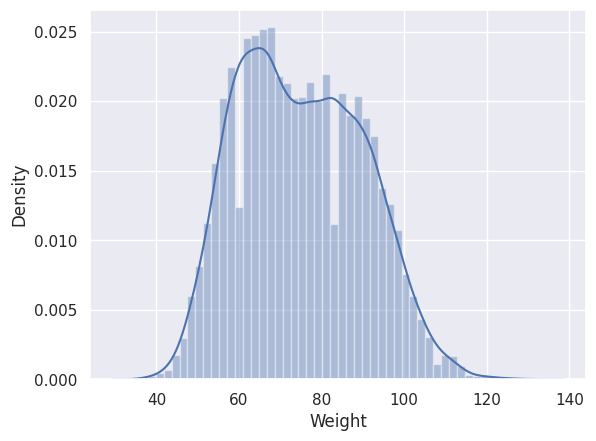

In [17]:
sns.distplot(df['Weight'])

<ipython-input-18-3ad985f75ace>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

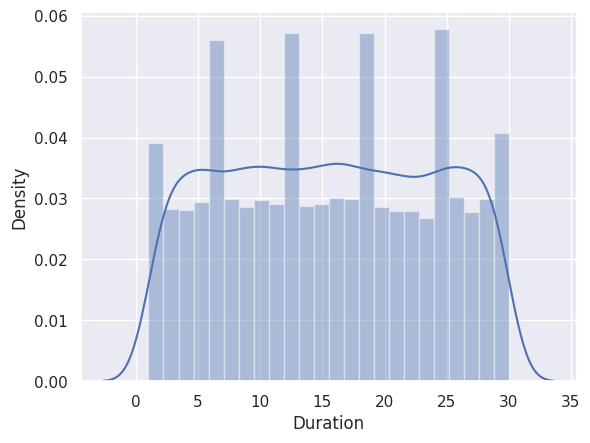

In [18]:
sns.distplot(df['Duration'])

<ipython-input-19-59954323602f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

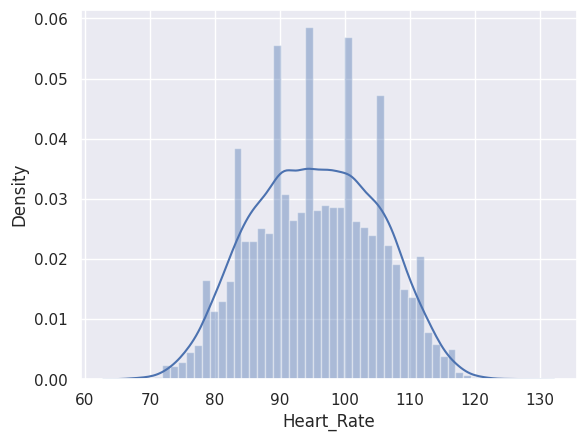

In [19]:
sns.distplot(df['Heart_Rate'])

<ipython-input-20-3c6964c09d5d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

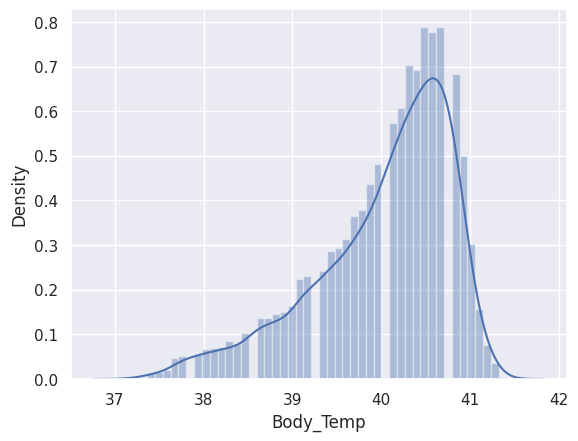

In [20]:
sns.distplot(df['Body_Temp'])

Convert text data to numerical data

In [23]:
df.replace({"Gender":{"male":0,"female":1}}, inplace=True)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Find correlation in the data

In [24]:
correlation_data = df.corr()

<Axes: >

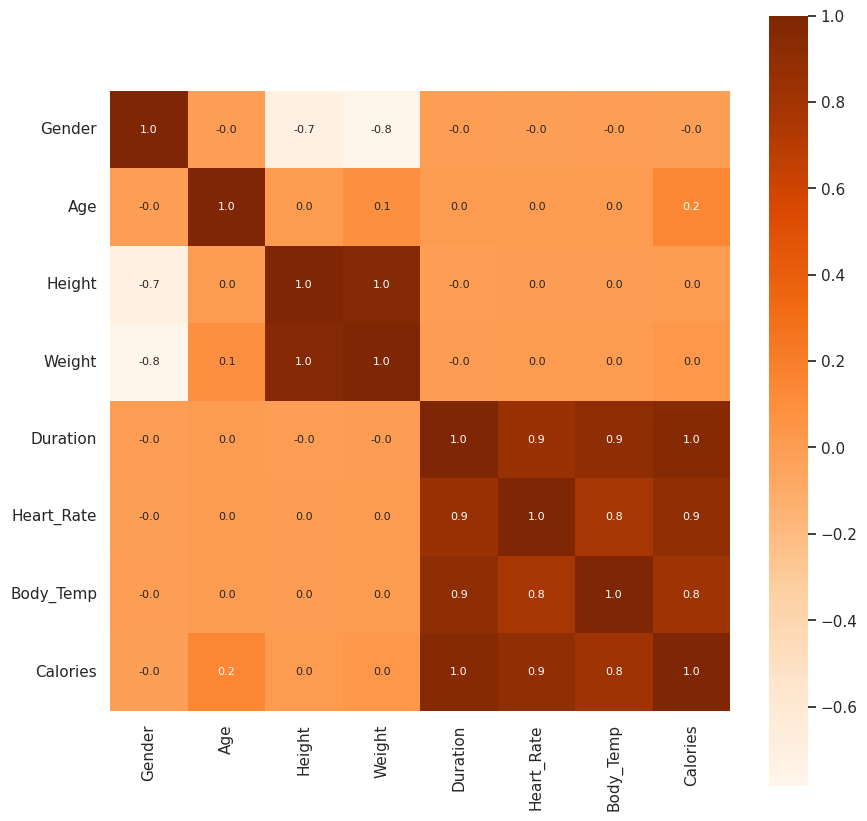

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_data, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Oranges')

Separate features and target coloms

In [28]:
x = df.drop(['Calories'],axis=1)
y = df['Calories']

In [29]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [30]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Split the data into train data and test data

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [32]:
(x.shape,x_train.shape,x_test.shape)

((15000, 7), (12000, 7), (3000, 7))

XGBoost Regressor Model Implementation

In [33]:
chappie = XGBRegressor()

In [34]:
chappie.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
calories_predict = chappie.predict(x_test)

In [36]:
calories_predict

array([125.58828 , 222.11377 ,  38.725952, ..., 144.3179  ,  23.425894,
        90.100494], dtype=float32)

In [51]:
accuracy=chappie.score(x_train,y_train)

print('Accuracy of the model:',accuracy*100,'%')

Accuracy of the model: 99.95691477017405 %


Mean Absolute Error

In [48]:
MAE = metrics.mean_absolute_error(y_test, calories_predict)
MAE

1.4833678883314132

Building a prediction system for evaluating

In [49]:
input = (0,68,190.0,94.0,29.0,105.0,40.8)

input = np.asarray(input)
input = input.reshape(1,-1)

prediction_value = chappie.predict(input)
print(prediction_value)

[236.13371]


In [50]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
